In [ ]:
import os
os.chdir("drive/MyDrive/Colab Notebooks")

11490434/11490434 [==============================] - 0s 0us/step


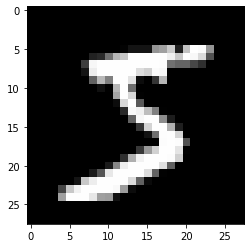

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

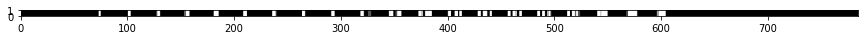

In [ ]:
# here is an attempt at illustrating what flattening looks like
reshaped = train_images[155].reshape((1, 28*28))
plt.figure(figsize=(15, 0.1))
plt.pcolormesh(reshaped, cmap="Greys_r")
plt.show()

In [ ]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [ ]:
# define the linear model
# weight dimensions are completely determined by input/output dimensions
# W = tf.Variable(np.zeros([28*28, 10]).astype(np.float32))
# b = tf.Variable(np.zeros(10, dtype=np.float32))

Weight_0 = tf.Variable(tf.random.uniform(shape = [28*28, 256], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
# bias_0 = tf.Variable(tf.random.normal([128], dtype=np.float32))
bias_0 = tf.Variable(np.zeros(256, dtype=np.float32))
# Weight_1 = tf.Variable(tf.random.uniform(shape = [512, 128], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
# bias_1 = tf.Variable(tf.random.normal([128], dtype=np.float32))
Weight_2 = tf.Variable(tf.random.uniform(shape = [256, 10], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
# bias_2 = tf.Variable(tf.random.normal([10], dtype=np.float32))
bias_2 = tf.Variable(np.zeros(10, dtype=np.float32))


def model(inputs):
    output_0 = tf.nn.relu(tf.matmul(inputs, Weight_0) + bias_0)
    # output_1 = tf.nn.relu(tf.matmul(output_0, Weight_1) + bias_1)
    output_2 = tf.nn.relu(tf.matmul(output_0, Weight_2) + bias_2)
    return output_2

# NOTE
# the ONLY thing that you should have to change for a working MLP is to
# - add more variables
# - adapt the model function (don't forget activation functions)
# - add the new variables in the gradient call/update below

# parameters for the training process
# this already offers potential for experimentation
# - how many steps do we actually need to reach acceptable performance?
# - what if we train for some absurd number of steps?
# - what happens if we increase/decrease the learning rate?
# - do learning rate and number of steps interact?
# - ...
train_steps = 6000
learning_rate = 0.5

In [ ]:
# training loop
for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape(persistent=True) as tape:
        logits = model(image_batch)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=label_batch))
        
    grads_0 = tape.gradient(xent, [Weight_0, bias_0])
    Weight_0.assign_sub(learning_rate * grads_0[0])
    bias_0.assign_sub(learning_rate * grads_0[1])

    # grads_1 = tape.gradient(xent, [Weight_1, bias_1])
    # Weight_1.assign_sub(learning_rate * grads_1[0])
    # bias_1.assign_sub(learning_rate * grads_1[1])

    grads_2 = tape.gradient(xent, [Weight_2, bias_2])
    Weight_2.assign_sub(learning_rate * grads_2[0])
    bias_2.assign_sub(learning_rate * grads_2[1])  

    del tape
    # every so often we print loss/accuracy
    if not step % 500:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent, acc))

Step 1. Batch loss: 2.339751720428467 Batch accuracy: 0.078125
Starting new epoch...
Step 501. Batch loss: 0.0949556902050972 Batch accuracy: 0.984375
Starting new epoch...
Step 1001. Batch loss: 0.06079687550663948 Batch accuracy: 0.984375
Starting new epoch...
Step 1501. Batch loss: 0.042873136699199677 Batch accuracy: 0.984375
Starting new epoch...
Step 2001. Batch loss: 0.04424075782299042 Batch accuracy: 0.984375
Starting new epoch...
Step 2501. Batch loss: 0.021050531417131424 Batch accuracy: 1.0
Starting new epoch...
Step 3001. Batch loss: 0.05318629741668701 Batch accuracy: 0.984375
Starting new epoch...
Step 3501. Batch loss: 0.009625637903809547 Batch accuracy: 1.0
Starting new epoch...
Step 4001. Batch loss: 0.007542750798165798 Batch accuracy: 1.0
Starting new epoch...
Step 4501. Batch loss: 0.015106895007193089 Batch accuracy: 1.0
Starting new epoch...
Step 5001. Batch loss: 0.014659600332379341 Batch accuracy: 0.9921875
Starting new epoch...
Step 5501. Batch loss: 0.00627

In [ ]:
test_preds = tf.argmax(model(data.test_data), axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Test accuracy using Relu: {}".format(acc))

Test accuracy using Relu: 0.9800000190734863


1> step-size effects accuracy ->
*   2000 steps results in an accuracy of ~ 95%
*   5000 steps results in an accuracy of ~ 96%
*   5000 steps results in an accuracy of ~ 97.35%

3> Learning rate effects ->
*   step = 4000, LR = 0.05 , accuracy ~ 96.1 (increased training time, minute weight updation takes place)
*   step = 4000, LR = 0.5 , accuracy ~ 86.87 (drops, high LR skips local minima )

4> Learning rate &  number of steps are inter-dependent






In [ ]:
# define the linear model
# weight dimensions are completely determined by input/output dimensions

Weight_0 = tf.Variable(tf.random.uniform(shape = [28*28, 256], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
bias_0 = tf.Variable(np.zeros(256, dtype=np.float32))
Weight_2 = tf.Variable(tf.random.uniform(shape = [256, 10], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
bias_2 = tf.Variable(np.zeros(10, dtype=np.float32))


def model(inputs):
    output_0 = tf.nn.softmax(tf.matmul(inputs, Weight_0) + bias_0)
    output_2 = tf.nn.softmax(tf.matmul(output_0, Weight_2) + bias_2)
    return output_2

# NOTE
# the ONLY thing that you should have to change for a working MLP is to
# - add more variables
# - adapt the model function (don't forget activation functions)
# - add the new variables in the gradient call/update below

# parameters for the training process
# this already offers potential for experimentation
# - how many steps do we actually need to reach acceptable performance?
# - what if we train for some absurd number of steps?
# - what happens if we increase/decrease the learning rate?
# - do learning rate and number of steps interact?
# - ...
train_steps = 4000
learning_rate = 0.1

In [ ]:
# training loop
for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape(persistent=True) as tape:
        logits = model(image_batch)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=label_batch))
        
    grads_0 = tape.gradient(xent, [Weight_0, bias_0])
    Weight_0.assign_sub(learning_rate * grads_0[0])
    bias_0.assign_sub(learning_rate * grads_0[1])

    # grads_1 = tape.gradient(xent, [Weight_1, bias_1])
    # Weight_1.assign_sub(learning_rate * grads_1[0])
    # bias_1.assign_sub(learning_rate * grads_1[1])

    grads_2 = tape.gradient(xent, [Weight_2, bias_2])
    Weight_2.assign_sub(learning_rate * grads_2[0])
    bias_2.assign_sub(learning_rate * grads_2[1])  

    del tape
    # every so often we print loss/accuracy
    if not step % 500:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent, acc))

Step 1. Batch loss: 2.3025689125061035 Batch accuracy: 0.0625
Starting new epoch...
Starting new epoch...
Step 501. Batch loss: 2.3027420043945312 Batch accuracy: 0.0520833320915699
Starting new epoch...
Step 1001. Batch loss: 2.3018712997436523 Batch accuracy: 0.1328125
Starting new epoch...
Step 1501. Batch loss: 2.3018949031829834 Batch accuracy: 0.1171875
Starting new epoch...
Step 2001. Batch loss: 2.301546573638916 Batch accuracy: 0.1171875
Starting new epoch...
Step 2501. Batch loss: 2.3033430576324463 Batch accuracy: 0.0859375
Starting new epoch...
Step 3001. Batch loss: 2.304590940475464 Batch accuracy: 0.0703125
Starting new epoch...
Step 3501. Batch loss: 2.3024563789367676 Batch accuracy: 0.109375
Starting new epoch...
Step 4001. Batch loss: 2.3003926277160645 Batch accuracy: 0.109375


In [ ]:
test_preds = tf.argmax(model(data.test_data), axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Test accuracy using Softmax: {}".format(acc))

Test accuracy using Softmax: 0.11349999904632568


Accuracy for Softmax activation is too low (11%), hence not usable.